<a href="https://colab.research.google.com/github/robertZZZZZZZZ/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

### Data prep and loading

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight*X + bias
y[:10], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
X_test.shape, X_train.shape, y_test.shape, y_train

(torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460]]))

In [53]:
def plot_predicitions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_preds):

        plt.figure(figsize=(10, 7), layout='constrained')
        plt.scatter(train_data, train_labels, c="b", s=4, label= "training")
        plt.scatter(test_data, test_labels, c="g", s=4, label= "test")

        if predictions is not None:
          plt.scatter(test_data, predictions, c="r", s=4, label= "pred")

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("linear regression")
        plt.legend()

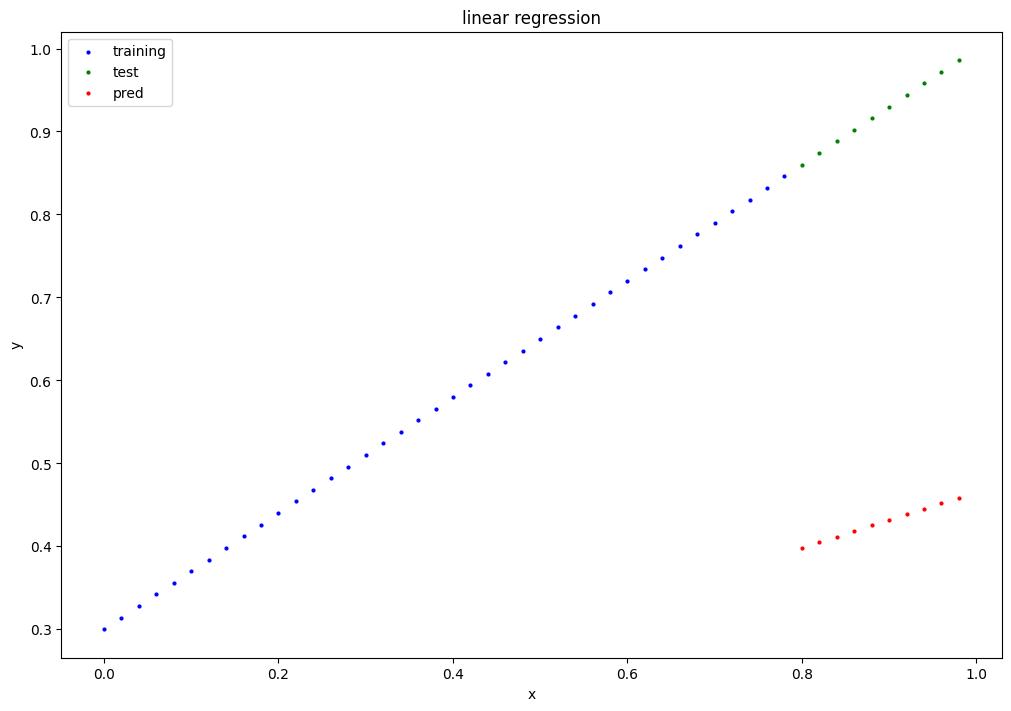

In [54]:
plot_predicitions()

In [47]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.weight * x + self.bias
    
   

### Pytorch model building essentials

* torch.nn
* torch.nn.Parameters
* torch.nn.Module
* torch.optim
* def forward() - All nn.Module subclasses require to overwrite this methode
* torch.utils.data.Dataset
* torch.utils.data.Dataloader

In [48]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making pred using `torch.inference_mode()`

In [49]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## Training